In [2]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
from scipy.sparse import csc_matrix, eye, diags
from scipy.sparse.linalg import spsolve
import scipy
import os
from astropy.time import Time
from astropy import units as u
import matplotlib

In [4]:
path1='data/BR/'
path2='data/SR/'
files1=os.listdir(path1)
files2=os.listdir(path2)
wf1=[]
wf2=[]
for i in files1:
    wf1.append(Waterfall(path1+i))
for i in files2:
    wf2.append(Waterfall(path2+i))
wf=wf1+wf2
len(wf)

77

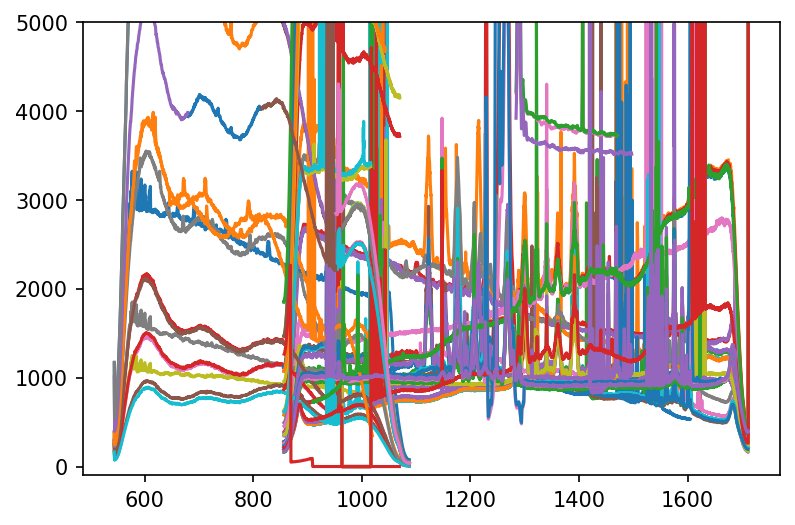

In [11]:
plt.figure(dpi=150)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    plt.plot(f,p)
    plt.ylim(-100,5000)
    #plt.yscale('log')

WARING max iteration reached!
WARING max iteration reached!


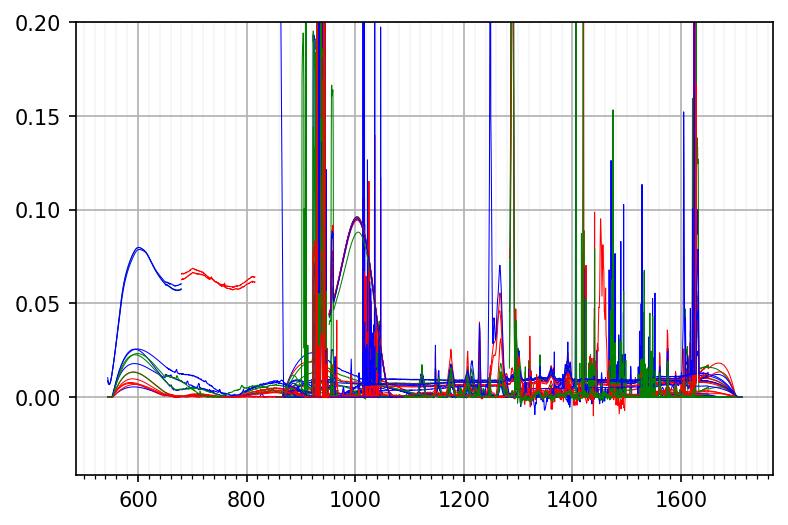

In [33]:
j=0
plt.figure(dpi=150)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    index_1=np.where((f>=544.0)&(f<=650.0))
    index_2=np.where((f>=856.0)&(f<=920.0))
    index_3=np.where((f>=960.0)&(f<=1088.0))
    index_4=np.where((f>=1650.0)&(f<=1712.0))
    p[index_1]=base[index_1]
    if i.container.f_start==856.0:
        p[index_2]=base[index_2]
    if np.round(i.container.f_stop,decimals=1)==1088.0:
        p[index_3]=base[index_3]
    p[index_4]=base[index_4]
    #plotting
    if j%3==0:
        plt.plot(f,p/np.linalg.norm(p),'r',label='Observed',lw=0.5)
    elif j%3==1:
        plt.plot(f,p/np.linalg.norm(p),'b',label='Observed',lw=0.5)
    else:
        plt.plot(f,p/np.linalg.norm(p),'g',label='Observed',lw=0.5)
    RFI=rfi.rfi_range(i,dist=40)
    tot=0
#     for k in RFI:
#         plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),color='lime',width=(k[1]-k[0]),bottom=np.amin(base))
#         tot+=(k[1]-k[0])
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    #plt.xlim(544,1712)
    plt.ylim(ymax=0.2)
    #plt.yscale('log')
    #plt.legend()
    j+=1
# plt.savefig('plots/after_mid/all_fitting_BR.pdf',bbox_inches = 'tight')
# plt.close()

WARING max iteration reached!
WARING max iteration reached!


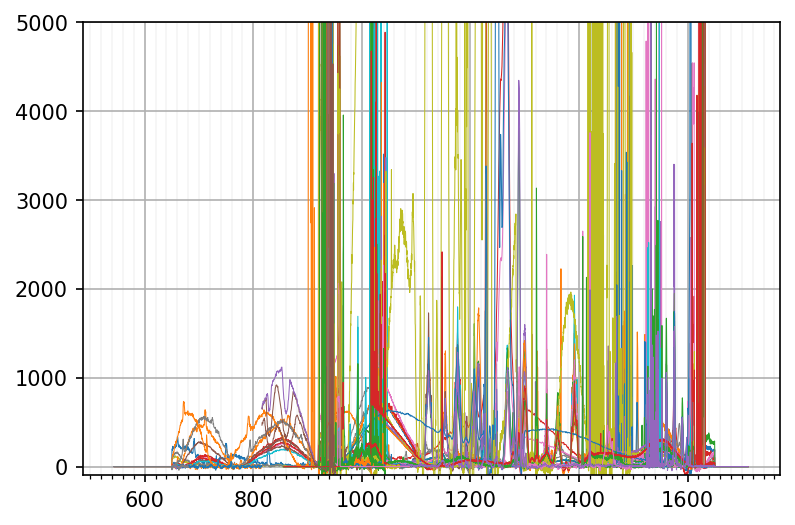

In [48]:
j=0
plt.figure(dpi=150)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
    elif snr>3:
        base=rfi.splbase(f,p)
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
    index_1=np.where((f>=544.0)&(f<=650.0))
    index_2=np.where((f>=856.0)&(f<=920.0))
    index_3=np.where((f>=960.0)&(f<=1088.0))
    index_4=np.where((f>=1650.0)&(f<=1712.0))
    p[index_1]=base[index_1]
    if i.container.f_start==856.0:
        p[index_2]=base[index_2]
    if np.round(i.container.f_stop,decimals=1)==1088.0:
        p[index_3]=base[index_3]
    p[index_4]=base[index_4]
    #plotting
    plt.plot(f,p-base,label='Observed',lw=0.5)
    RFI=rfi.rfi_range(i,dist=40)
    tot=0
#     for k in RFI:
#         plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),color='lime',width=(k[1]-k[0]),bottom=np.amin(base))
#         tot+=(k[1]-k[0])
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    #plt.xlim(544,1712)
    plt.ylim(-100,5000)
    #plt.yscale('log')
    #plt.legend()
    j+=1
# plt.savefig('plots/after_mid/all_fitting_BR.pdf',bbox_inches = 'tight')
# plt.close()